In [2]:
import sys
sys.path.append('..')

In [3]:
import os
from tqdm import tqdm
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
from DomainPrediction.utils import helper

### T domain Dataset

In [5]:
data_path = '/nethome/kgeorge/workspace/DomainPrediction/Data/fitness_prediction/Tdomain'

In [6]:
df = pd.read_csv(os.path.join(data_path, 'dataset_2_tdomain.csv'))

In [7]:
df.head()

,name,seq,fitness_raw,split_id,n_mut,fitness_log
0,WT,APGEDAFARQAYQAPQGEIEIALATIWRELLNVEQVGRHDSFFALG...,1.000000,2,0,0.000000
1,ESM1,APEDSSFPRPPYAAPEGEIEQTLAGIWMELLGVERVGRHDSFFALG...,0.982485,2,44,-0.017670
2,ESM2,APSEDAYPRATYEAPEGETEQLLAGIWMDLLQVDRVGRHDSFFELG...,1.730126,0,45,0.548194
3,ESM3,APSEDSYPRPAYVAPEGPTEQLLAGIWQELLNVSKVGRDDSFFDLG...,0.073117,2,46,-2.615701
4,ESM4,APEEASYPREPYVAPQGETEQLLASIWQELLGVERVGAGDNFFELG...,0.457921,2,43,-0.781059


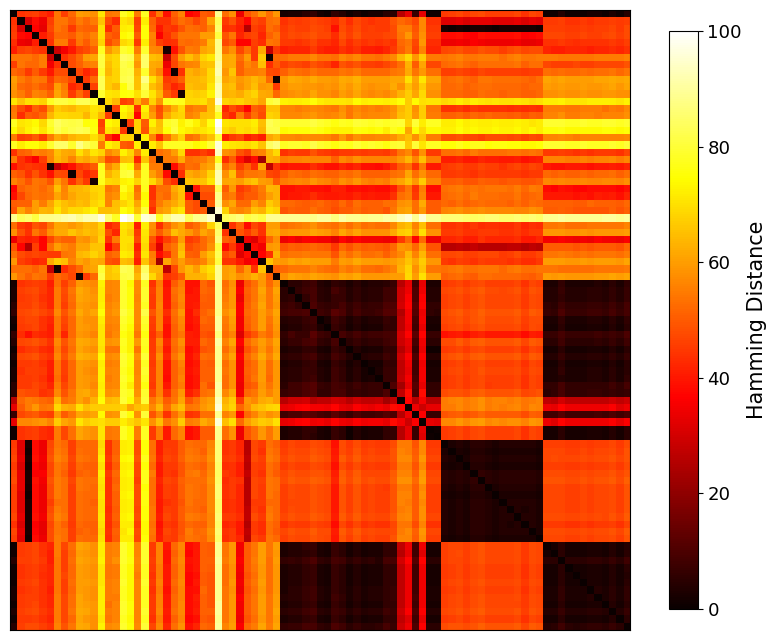

In [8]:
dist_matrix = np.eye(df['seq'].shape[0])
sequences = df['seq'].to_numpy()
for i in range(sequences.shape[0]):
    for j in range(sequences.shape[0]):
        dist_matrix[i, j] = helper.hamming_distance(sequences[i], sequences[j])

plt.figure(figsize=(10,10))
plt.imshow(dist_matrix, cmap='hot')
colorbar = plt.colorbar(shrink=0.75)
colorbar.ax.tick_params(labelsize=13)
colorbar.set_label('Hamming Distance', size=15)
plt.xticks([])
plt.yticks([])
plt.show()

/tmp/ipykernel_2427022/3981828786.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  _df['name'] = pd.Categorical(_df['name'], categories=ai_gen, ordered=True)


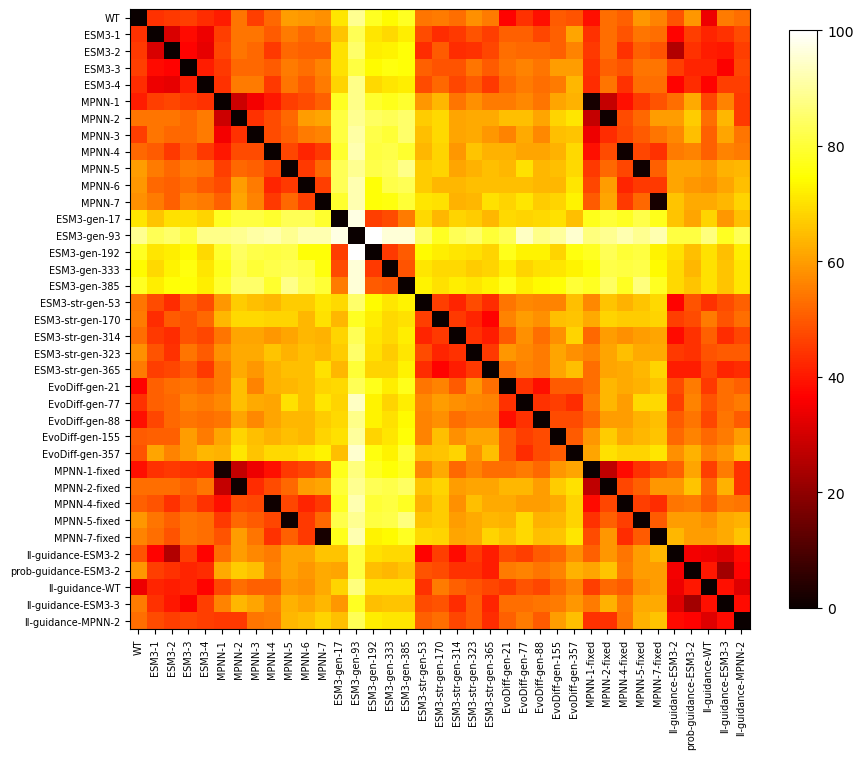

In [27]:
ai_gen = ['WT', 'ESM1', 'ESM2', 'ESM3', 'ESM4', 'IN1', 'IN2', 'IN3', 'IN4', 'IN5', 'IN6', 'IN7', 
          'esm3_gen_17', 'esm3_gen_93', 'esm3_gen_192', 'esm3_gen_333', 'esm3_gen_385', 
          'esm3_str_gen_53', 'esm3_str_gen_170', 'esm3_str_gen_314', 'esm3_str_gen_323', 'esm3_str_gen_365', 
          'evodiff_gen_21', 'evodiff_gen_77', 'evodiff_gen_88', 'evodiff_gen_155', 'evodiff_gen_357', 
          'Test-IN1-improved', 'Test-IN2-improved', 'Test-IN4-improved', 'Test-IN5-improved', 'Test-IN7-improved', 
          'II guidance-ESM2', 'prob_guidancd-ESM2', 'II guidance-WT', 'II_guidance-ESM3', 'II guidance-IN2']

_label = ['WT', 'ESM3-1', 'ESM3-2', 'ESM3-3', 'ESM3-4', 'MPNN-1', 'MPNN-2', 'MPNN-3', 'MPNN-4', 'MPNN-5', 'MPNN-6', 'MPNN-7', 
          'ESM3-gen-17', 'ESM3-gen-93', 'ESM3-gen-192', 'ESM3-gen-333', 'ESM3-gen-385', 
          'ESM3-str-gen-53', 'ESM3-str-gen-170', 'ESM3-str-gen-314', 'ESM3-str-gen-323', 'ESM3-str-gen-365', 
          'EvoDiff-gen-21', 'EvoDiff-gen-77', 'EvoDiff-gen-88', 'EvoDiff-gen-155', 'EvoDiff-gen-357', 
          'MPNN-1-fixed', 'MPNN-2-fixed', 'MPNN-4-fixed', 'MPNN-5-fixed', 'MPNN-7-fixed', 
          'll-guidance-ESM3-2', 'prob-guidance-ESM3-2', 'll-guidance-WT', 'll-guidance-ESM3-3', 'll-guidance-MPNN-2']

mask = df['name'].isin(ai_gen)
_df = df[mask]
_df['name'] = pd.Categorical(_df['name'], categories=ai_gen, ordered=True)
_df = _df.sort_values('name')

dist_matrix = np.eye(_df['seq'].shape[0])
sequences = _df['seq'].to_numpy()
for i in range(sequences.shape[0]):
    for j in range(sequences.shape[0]):
        dist_matrix[i, j] = helper.hamming_distance(sequences[i], sequences[j])

plt.figure(figsize=(10,10))
plt.imshow(dist_matrix, cmap='hot')
plt.colorbar(shrink=0.75)
plt.xticks(np.arange(len(ai_gen)), _label, size=7, rotation=90)
plt.yticks(np.arange(len(ai_gen)), _label, size=7)
plt.show()

Text(0, 0.5, 'Count')

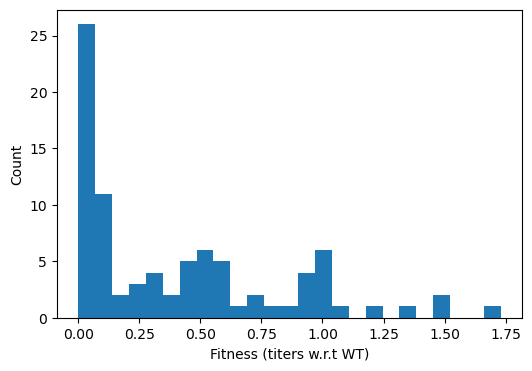

In [38]:
fig, ax = plt.subplots(1,1, figsize=(6,4))

ax.hist(df['fitness_raw'], bins=25)
ax.set_xlabel('Fitness (titers w.r.t WT)')
ax.set_ylabel('Count')

In [31]:
df[df['fitness_raw']==0]

,name,seq,fitness_raw,split_id,n_mut,fitness_log
5,IN1,APGIEAYARPPYVAPQGERERLLASLWRELLRVPEVGANDSFFALG...,0.0,2,41,-13.815511
6,IN2,RPGIEAYAIPPFKAPKGERERLLAEYYKELLDVNEVSSNDSFFKLG...,0.0,2,54,-13.815511
8,IN4,APGPEAYPRAPFVAPEGERERLLAEILAELLDVPRVGAGDGFFALG...,0.0,2,52,-13.815511
9,IN5,QPAPAAHAVPPAVAPEGEVEFLLADIMKRLLNVSRVSANKRFFALG...,0.0,2,60,-13.815511
11,IN7,APPLAAYPTPPYRAPVGPREELLARIVKSVLKVDRVGADDGFLRLG...,0.0,2,58,-13.815511
12,esm3_gen_17,IPDASTLPTAEYVAPRTEVEQTLAGIWAELLGVEQVGIHDNFFDLG...,0.0,1,71,-13.815511
16,esm3_gen_333,QPDRAVLLEQAYVAPRTTLEEQLASIWSELLQRERVGIHDNFFELG...,0.0,1,74,-13.815511
45,GxpS_DESIGN-11,APGEDAFARQAYQAPQGEIEIALATIWRELLNVEQVGRHDSFFALG...,0.0,2,4,-13.815511
53,GxpS_DESIGN-22,APGEDAFARQAYQAPQGEIEIALATIWRELLNVEQVGRHDSFFALG...,0.0,2,26,-13.815511
54,GxpS_DESIGN-23,APGEDAFARQAYQAPQGEIEIALATIWRELLNVEQVGRHDSFFALG...,0.0,2,33,-13.815511
